In [94]:
# Funktion zum Visualisieren
import matplotlib.pyplot as plt

def plot_losses(losses):
    plt.plot(losses)
    plt.xlabel('trainingsschritt')
    plt.ylabel('max_error_für_epoche')
    plt.show()

In [8]:
# Fehlerfunktion
def lossfunction(x, y):
    loss = (x - y)**2
    return loss

# 1. Ableitung der Fehlerfunktion (= f(x)) in Abhängigkeit zu x.
# = Analytisch:     Das Verhältnis zw. der winzigen Veränderung in f(x) (= f(x+dx) - f(x)) 
#                   und der sich 0 annähernden winzigen Veränderung in x (= dx).
# = Geometrisch:    Die Steigung der Tangente, die den Graphen von f(x) am Punkt (x, f(x)) berührt.
# = Symbolisch:     lim x -> 0: (f(x + dx) - f(x)) / dx 
def dlossfunction_dx(x, y):
    z = 2*(x - y)
    return z

In [9]:
# Datenset
# [[x0, x1], y/label]
Dataset = [
    [[0,0], 0],
    [[0,1], 1],
    [[1,1], 1],
    [[1,0], 0]
]

In [14]:
# Forwardschritt definieren
def forward(x0, x1):
    x = x0*w0 + x1*w1
    return x

# Funktion zur Anpassung der Gewichte definieren.
def optimieren(w0, w1, x, y, x0, x1, learning_rate):
    z = dlossfunction_dx(x, y)
    w0 = w0 - z * x0 * learning_rate
    w1 = w1 - z * x1 * learning_rate
    return w0, w1

In [106]:
# Gewichte definieren/initialisieren
from random import uniform
w0 = uniform(-1, 1)#0.3
w1 = uniform(-1, 1)#-0.2
print('Initialisiert    : w0 = '+str(w0)+', w1 = '+str(w1))

Initialisiert    : w0 = -0.6118016779925779, w1 = -0.8546285164715008


Nach Training    : w0 = 0.0, w1 = 1.0


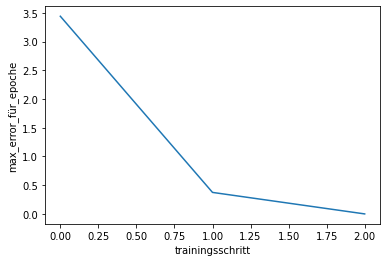

In [107]:
# Trainingsloop
num_epochs = 3
learning_rate = 0.5

fehlerhistorie = []
for i_epoch in range(num_epochs):
    losses_epoch = []
    for trainingsbeispiel in Dataset:
        x0, x1  = trainingsbeispiel[0]
        y       = trainingsbeispiel[1]
        x       = forward(x0, x1)
        losses_epoch.append(lossfunction(x, y))
        w0, w1  = optimieren(w0, w1, x, y, x0, x1, learning_rate)
    fehlerhistorie.append(max(losses_epoch))

#print('Fehlerhistorie   :', fehlerhistorie)
print('Nach Training    : w0 = '+str(w0)+', w1 = '+str(w1))
plot_losses(fehlerhistorie)